practice_02.ipynb

# Practice : making a two-layer neural network

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

## Building a Neural Network – It's All About Structure

We build a neural network the same way we built a single neuron.  
Yes, you heard that right: **once you understand the architecture and method, you can build any neural network.**

Just like with a neuron, a neural network needs a model, a cost function, a way to optimize that cost, and a method to update the model’s parameters.  
This hasn’t changed. A neuron and a neural network both belong to the same deep learning framework.

So, what do we need?
- A function to initialize the parameters
- A model
- A cost function
- An optimization rule

Let’s start by reusing the exact same tools we used for a single neuron.  
That way, we’ll clearly see what’s new when we move to a full network.

### What stays the same in this case?

Good news: **almost everything**.

- Same architecture: `model / cost / optimization / update`
- So same activation function
- So same cost function
- So same parameter update rule

So, what actually changes?

**The only major difference** between a single neuron and a neural network is the **concept of dimensionality**.


### What Is Dimensionality?

Dimensionality helps us **structure** the network.

With just one neuron, it's too simple to talk about dimensions.  
But with multiple layers and neurons, we need to know:
- How many layers?
- How many neurons per layer?

### Why does this matter?

Because:
1. **Correct dimensions = valid matrix calculations.**  
   Without this, nothing works.
2. **Matrix operations are the language of neural networks.**  
   They're the backbone, the skeleton of your model.
3. **Your architecture must match your problem.**  
   You can’t build a solution without fitting it to your data.

### So... How Do We Do It?

We define our network dimensions when we **initialize the parameters** — that means the **weights and biases**.

Here’s the key idea:

> To create a new layer in a neural network, you define a new weight matrix (and a new bias vector).

> To add neurons to a layer, you change the **size** (i.e., **the dimension**) of those matrices.

### Step-by-Step:

- For **each layer**, you:
  - Create a weight matrix and a bias vector
  - Choose how many neurons it will have
  - Make sure the shape of the matrix matches the input/output of the previous layer

But there’s a catch:

> Your network must **match the input dimension of your dataset**.

### Example: Toxic vs. Non-Toxic Plants

In the first notebook example, each plant has 2 features:
- Leaf length
- Leaf width

So your **input data has 2 dimensions**.  
Indeed, each plant can be represented on a 2D graph — one axis for length, one for width.

That means your first layer’s **weight matrix must reflect these 2 input features**.

Now, here’s something important:

> Don’t get stuck on “rows vs columns.”  
> What matters is **compatibility** between the dimensions of the input and the weight matrix.

If your weight matrix has 2 rows (for 2 features) and as many columns as there are neurons — great.  
If you did the opposite (2 columns and several rows), you could just **transpose** the matrix.

> You can always flip the matrix using `.T` — it’s mathematically equivalent.  
> If you’re unfamiliar with matrix transposition, just Google it — it’s super simple.

The **shape** of your weight matrix must match:
- The number of **input features** (to receive data from the previous layer or input),
- The number of **neurons in the current layer** (to produce the correct output).

Once you’ve chosen an orientation (e.g., rows = features, columns = neurons), **stay consistent** throughout your whole network.  
That way, your matrix operations will work cleanly across all layers.

> Consistency in dimension shapes = smooth matrix calculations = working neural network.

*The **bias vector** for each layer just matches the number of neurons (columns in the weight matrix).*

### Then What?

For each next layer, do the same:
- The **number of rows** in the weight matrix = number of neurons in the previous layer
- The **number of columns** = number of neurons in the current layer

Repeat this until the final layer.

In the **output layer**, the number of columns equals the number of outputs you want.  
Example: binary classification → 1 output neuron.

But it depends on your problem:
- For **multi-class classification**, you might have as many outputs as classes.
- For **clustering**, you might have as many outputs as clusters.

*(Yeah I told you you will be a data scientist by the end of this journey.)*

> Key summary: proper parameter dimensions allow your layers to connect and communicate through matrix calculation — that's the true purpose of initialization.

It’s not about filling with random values for fun.  
It’s about building a **functional, adaptable architecture** that fits your problem.

## If You Got This Far
I will be honest for a sec:\
Congratulations — you now understand something many people struggle with for weeks. In my engineering school (im M2 data science), half of my promo don't know that. Traduction: 50% of my promo don't know what a neural network is.\
You’re already ahead of the game.

You’re already entering an exclusive circle of people who get how deep learning really works.

Let’s now see how we code all of this.


# Code

## DataSet

You are a data scientist and an explorer. You discovered a new land on planet Earth. You have to survive but there are only plants. \
Some of your friends got sick because they ate the wrong plants. You chose to act and predict if a plant is toxic or not. You made a list of plants and you want to know if they are toxic or not. You measured the following features:
- Leaf length
- Leaf width

You placed the plants on a 2D graph, this is what you got:

dimensions de X: (2, 100)
dimensions de y: (1, 100)


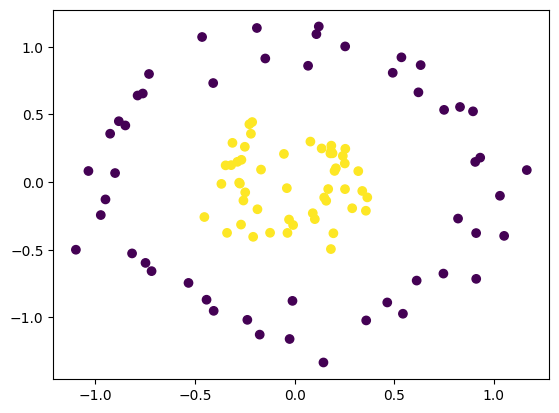

In [3]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y)
plt.show()


We can clearly see that in this situation, a **linear model is not able to separate the two classes of data points**.  

In traditional machine learning, a common approach in such cases is to use **feature engineering**—that is, creating new variables (features) from the existing ones in order to help the model separate the classes.  

For example, we could create a new feature such as the **product of $x_1$ and $x_2$**, or the **square of $x_1$ or $x_2$**, in an attempt to reveal a more complex, nonlinear relationship between the variables. This would allow a linear model to make more meaningful distinctions.  

However, **feature engineering is not always possible**, and it can be **time-consuming and tedious** to manually design and test new features.

This is **exactly where deep learning becomes powerful**. In such cases, we can use an **artificial neural network**, which will **automatically perform its own feature engineering**.  
Through multiple layers, the neural network will learn by itself how to transform the input space in order to **separate the two classes**—even when the relationship is nonlinear.

And what's truly fascinating is that **each individual neuron in the network still performs a linear transformation**.  
It’s the **stacking of layers** and **nonlinear activations** that gives rise to this powerful representation learning.

Do you see the power of deep learning now?


## Initialization

To make our `initialization` function accurately describe the structure of our neural network — and adapt it to the problem we want to solve — we need two things:
1. The **dimension of the input data** (i.e., the number of input features, $n_0$ in our case)
2. The **number of neurons we want in each layer** (i.e., the number of neurons in the first layer $n_1$, and the output layer, $n_2$)

Once we provide that, we manually create the parameter matrices. That’s how we initialize the layers — and the function takes care of the rest.

Let’s see how:


In [4]:
def initialisation(n0, n1, n2):
    # n0 is the input dimension — number of features going into the network
    # n1 is the number of neurons in the first (hidden) layer
    # n2 is the output dimension — number of neurons in the output layer

    # First layer: adapt to the input data
    W1 = np.random.randn(n1, n0)# weights from input (n0) to first layer (n1)
    b1 = np.random.randn(n1, 1) # bias vector for first layer (one bias per neuron)

    # Second layer: adapt to the first layer
    W2 = np.random.randn(n2, n1)# weights from first layer(n1) to output layer(n2)
    b2 = np.random.randn(n2, 1) # bias vectors for output layer

    # Bundle everything into a dictionary — it's cleaner and easy to manage
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parameters

We want to classify the plants as either toxic or non-toxic: it is a **binary classification** problem 

> So we only need **one output neuron**, so $n_2 = 1$

The data has 2 features: leaf length and width, so has a dimension of 2.

> So we have $n_0 = 2$.

## Forward propagation

You've just understood the most important function in our neural network — **initialization** — because it’s what really changes compared to a single neuron.

Now, all the other functions are basically the same as for a simple neuron… except they are now **matrix-based**.  

Why? Because matrix computation is the **backbone** of a neural network — and dimensions matter now.

Now that we have our neural network initialized, let’s write the function that sends the input data **through the network**.  
This is the **forward propagation** step — and its goal is to compute the activations of each neuron in each layer.

We will use the same models as the neuron we built, for each neuron in each layer :
- **Linear transformation**: $Z = W \cdot X + b$
- **Sigmoid Activation function** : $A = \frac{1}{1 + e^{-Z}}$

So the forward propagation is:

- $Z_1 = W_1 X + b_1$
- $A_1 = \sigma(Z_1)$
- $Z_2 = W_2 A_1 + b_2$
- $A_2 = \sigma(Z_2) = y_{pred}$

where $\sigma$ is the sigmoid activation function et $y_{pred}$ is the prediction of the model.

In [5]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    # First layer
    Z1 = W1.dot(X) + b1            # Linear transformation
    A1 = 1 / (1 + np.exp(-Z1))     # Sigmoid activation

    # Output layer
    Z2 = W2.dot(A1) + b2           # Linear transformation
    A2 = 1 / (1 + np.exp(-Z2))     # Sigmoid activation

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

We now have the activations of each neuron in each layer, stored in the `activations` dictionary.  
- $A_1$ corresponds to the activations of the **first hidden layer** neurons (with $n_1$ neurons, so $n_1$ activations).
- $A_2$ is the **output layer**'s activations (with $n_2$ neurons, so $n_2$ activations).

## Backpropagation

Now, we need to compute the **cost** of our neural network and optimize it to get the best parameters.

Nothing new here: we will use the same cost function as before, and the same optimization rule.
The only difference is that we will now use **matrix operations** to compute the cost and update the parameters.

### Cost function
We use the same log_loss to compute the cost of our neural network.

### Optimization
We use the same **gradient descent** algorithm to optimize our parameters.

We computed the gradients of the cost function with respect to the parameters in the previous notebook theory_02.ipynb.\
We use these gradients to update the parameters of our neural network.

Remember that the gradients we found using the **chain rule** of calculus :
$$
\left[
\begin{aligned}
\mathbf{\frac{\partial \mathcal{L}}{\partial W_2}} &= \mathbf{\frac{1}{m} (A_2 - y) \cdot A_1} \\
\mathbf{\frac{\partial \mathcal{L}}{\partial b_2}} &= \mathbf{\frac{1}{m} \sum_m{(A_2 - y)}} \\
\mathbf{\frac{\partial \mathcal{L}}{\partial W_1}} &= \mathbf{\frac{1}{m} dZ_1 \cdot X} \\
\mathbf{\frac{\partial \mathcal{L}}{\partial b_1}} &= \mathbf{\frac{1}{m} \sum_m{dZ_1}}
\end{aligned}
\right]
$$
With the terms:
$$
\left[
\begin{aligned}
\mathbf{dZ_2} &= \mathbf{A_2 - y} \\
\mathbf{dZ_1} &= \mathbf{dZ_2 \cdot W_2 \cdot A_1 \cdot (1 - A_1)}
\end{aligned}
\right]
$$

We are going to code this these gradients to update the parameters of our neural network.


In [6]:
from sklearn.metrics import log_loss, accuracy_score

In [7]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1] # number of samples

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients


Now that we have the gradients in the 'gradients' dictionary, we can update the parameters of our neural network using the same gradient descent algorithm as before, but in matrix form:
$$
W = W - \alpha \cdot \frac{\partial J}{\partial W}$$
$$
b = b - \alpha \cdot \frac{\partial J}{\partial b}
$$
where $\alpha$ is the learning rate.

In [8]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres


We have the set of the new parameters, optimized a little bit more.

To get the accuracy of our neural network (i.e., the percentage of correct predictions), we will use the same prediction function as before, but in matrix form:

We need the final activations of the output layer, $A_2$, to compute the predictions, because it's the output of our neural network.\
We will use the same threshold as before (0.5) to classify the predictions as 0 or 1 (toxic or non-toxic).

In [9]:
def predict(X, parameters):
    activations = forward_propagation(X, parameters)
    A2 = activations['A2']
    return A2 >= 0.5

We have everything we need to build our neural network. Let's gather all the functions in a single function that will train our neural network.

In [10]:
from tqdm import tqdm

In [11]:
def neural_network(X, y, n1=32, learning_rate=0.1, epoch=1000):

    # Get input/output dimensions
    n0 = X.shape[0]  # number of input features
    n2 = y.shape[0]  # number of outputs (=1 here because binary classification)

    # Initialize parameters
    np.random.seed(0)  # for reproducibility
    parameters = initialisation(n0, n1, n2)

    # Lists to track training loss and accuracy
    train_loss = []
    train_acc = []
    history = []  # Store full training history (optional)

    # Gradient descent loop (rela training loop)
    for i in tqdm(range(epoch)):
        # Forward propagation to get activations
        activations = forward_propagation(X, parameters)
        A2 = activations['A2']  # the target activation, the output of the network.

        # Compute the cost with the log_loss loss function
# the loss is a number not a matrix: flatten() converts a matrix to a number
        loss = log_loss(y.flatten(), A2.flatten())
        # Store it im the training loss list for plotting
        train_loss.append(loss)

        # Predict labels using current parameters
        y_pred = predict(X, parameters)

        # Compute accuracy
# the accuracy is a number not a matrix: flatten()
        accuracy = accuracy_score(y.flatten(), y_pred.flatten())

        # Store it in the training accuracy list for plotting
        train_acc.append(accuracy)
        
        # Save current state (optional, can be used for analysis/animation)
        history.append([parameters.copy(), train_loss, train_acc, i])

        # Backward propagation to get gradients: direction to update the parameters
        gradients = back_propagation(X, y, parameters, activations)

        # Update parameters using gradient descent
        parameters = update(gradients, parameters, learning_rate)

    return parameters, train_loss, train_acc, history


In [12]:
def plot_loss_acc(train_loss, train_acc):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot loss
    ax[0].plot(train_loss)
    ax[0].set_title('Training Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')

    # Plot accuracy
    ax[1].plot(train_acc)
    ax[1].set_title('Training Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')

    plt.show()

In [13]:
def plot_decision_boundary(X, y, parameters, resolution=0.01):
    # Generate a grid of points covering the feature space
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Flatten and stack the grid into shape (2, N)
    grid = np.c_[xx.ravel(), yy.ravel()].T

    # Predict class for each point in the grid
    Z = predict(grid, parameters)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary : plot all the points in the grid where y_pred == 0.5
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=y.flatten(), edgecolors='k', cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.show()


100%|██████████| 1000/1000 [00:00<00:00, 1754.75it/s]


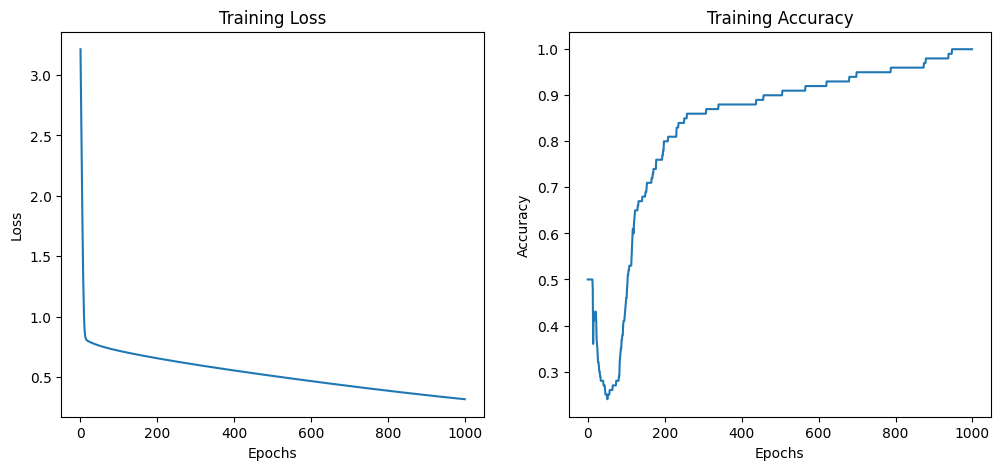

In [14]:
parameters, train_loss, train_acc, history = neural_network(X, y, n1=32, learning_rate=0.1, epoch=1000)
plot_loss_acc(train_loss, train_acc)

We can see that the neural network is able to classify the plants as toxic or non-toxic with an accuracy close to 100%.\
We can see that the cost is decreasing quickly, with a huge shift at the beginning, and then it stabilizes.\
That's a good sign that our neural network is ajusting the parameters correctly and quickly.\
The acuracy takes a little bit more time to stabilize because it is an average computation on the whole dataset, but it is converging to 100%.

As for the first neuron notebook, let's plot the decision boundary of our neural network. to see how it classifies the plants.

### Remember Decision Boundary?
 
The decision boundary is the set of input points where the model is equally uncertain, so it doesn't know whether to classify the input.

Remember, for binary classification we look for $y_{pred} = 0.5$ because the boundary is where the model doesn't know whether to classify the input as class 0 or class 1, ie : $A_2 = 0.5$ or $Z_2 = 0$ or $W_2 A_1 + b_2 = 0$.

In other words, the decision boundary is where the neural network hesitates between predicting class 0 or class 1.

In our case, we have a neural network with the following forward propagation :

- $Z_1 = W_1 X + b_1$
- $A_1 = \sigma(Z_1)$
- $Z_2 = W_2 A_1 + b_2$
- $A_2 = \sigma(Z_2) = y_{pred}$

with $X = (x_1, x_2)$ the input data.

### How to Compute the Decision Boundary?

Find the set of points $(x_1, x_2)$ such that $y_{pred} = 0.5$.

To visualize the decision boundary:

1. Create a grid of input points $(x_1, x_2)$ over the entire input space.
2. Compute predictions on this grid using `forward_propagation`.
3. Identify points where the output is close to 0.5, and draw the boundary.

Here’s the intuition:
- The model predicts class 0 where $y_{pred} < 0.5$
- The model predicts class 1 where $y_{pred} > 0.5$
- So the boundary is where $y_{pred} = 0.5$

### Why is the Decision Boundary Non-Linear?

Although each neuron performs a linear operation followed by a sigmoid, stacking layers introduces non-linearity:

- The hidden layer transforms the input space non-linearly.
- The output layer then applies another transformation.

This composition of functions allows the neural network to bend and warp the input space, creating complex decision boundaries — even though individual layers are linear.

This is what gives neural networks their expressive power: they automatically perform feature engineering by learning useful internal representations.

### Summary

- The decision boundary is where $y_{pred} = 0.5$
- It can be computed by evaluating the model over a grid of inputs
- Neural networks can learn complex, non-linear boundaries through stacked layers
- This removes the need for manual feature engineering

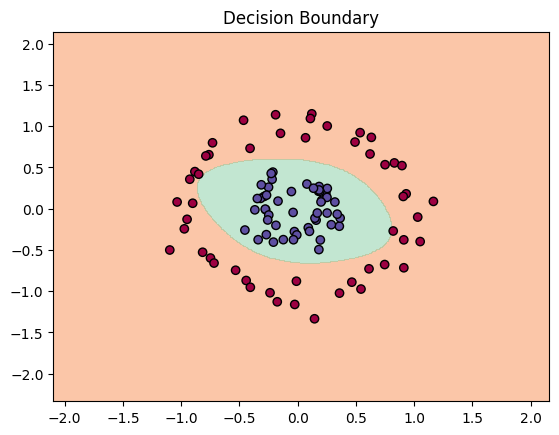

In [15]:
plot_decision_boundary(X, y, parameters)

This is the decison boundary of our neural network for 32 neurons in the hidden layer, a learning rate of 0.1 and 1000 epochs.\
We clearly see the non-linear decision boundary that separates the two classes of plants and why the accuracy is so high : everything input data is classified correctly.

Look the accuracy curve at 400 epochs, it seems to be just under 90%. That's means aound 10% of the plants are misclassified.

Let's see that :

100%|██████████| 400/400 [00:00<00:00, 1582.86it/s]


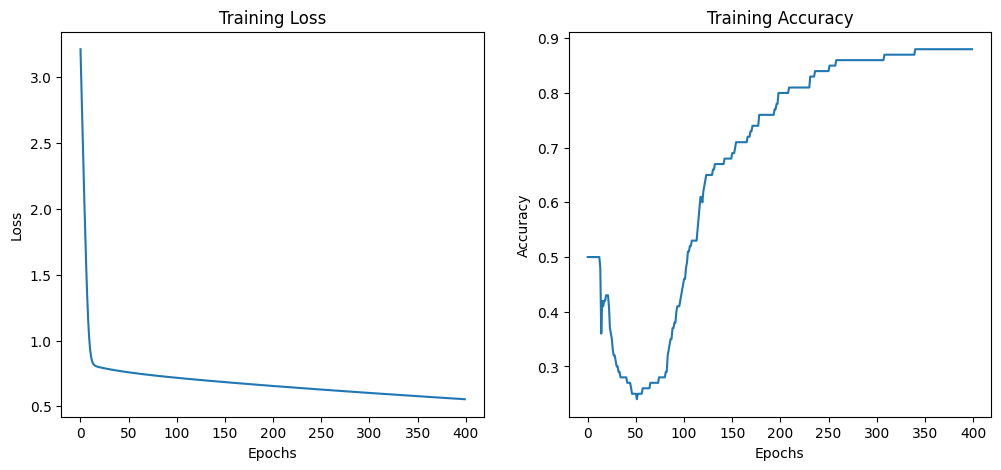

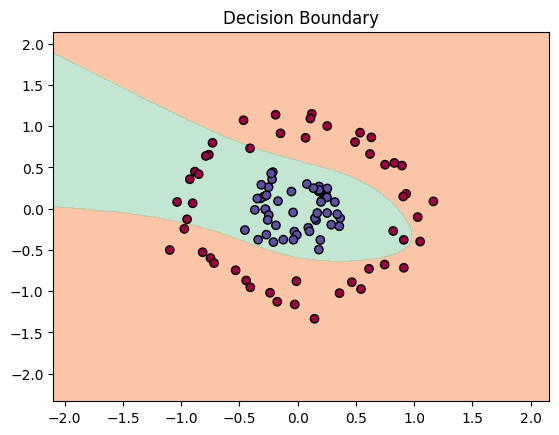

In [16]:
param, train_loss, train_acc, history = neural_network(X, y, n1=32, learning_rate=0.1, epoch=400)
plot_loss_acc(train_loss, train_acc)
plot_decision_boundary(X, y, param)

The loss is low but the neural network doesn't have enough time to adjust. We could increase the learning rate, but the risk is that the neural network might not converge and oscillate around mimimum cost.

But now we have a new parameter to play with: the number of neurons in the hidden layer!\
Let's double the number of neurons in the hidden layer to 64 and see what happens.

100%|██████████| 400/400 [00:00<00:00, 1434.10it/s]


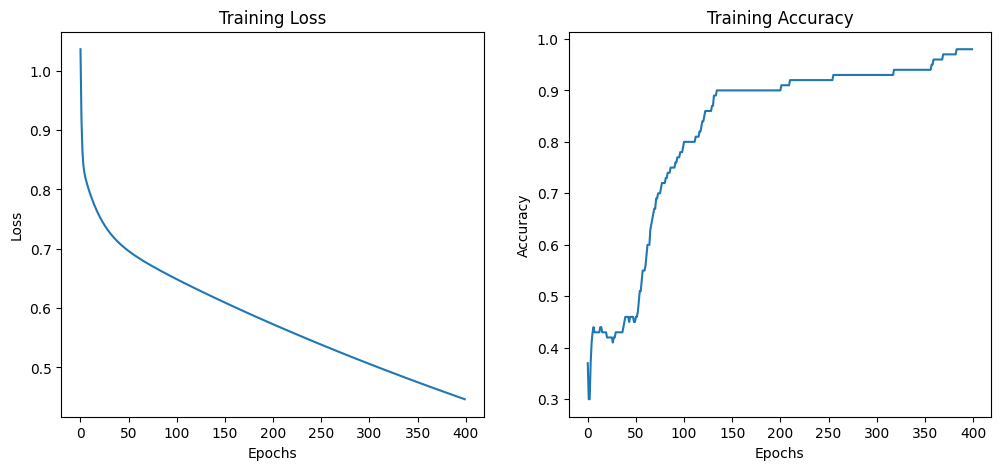

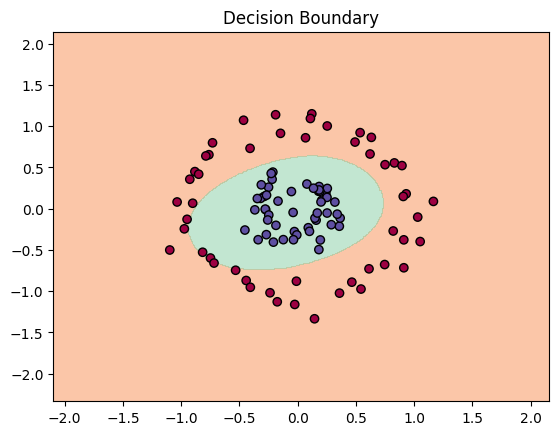

In [17]:
param_64, train_loss, train_acc, history = neural_network(X, y, n1=64, 
                                            learning_rate=0.1, epoch=400)
plot_loss_acc(train_loss, train_acc)
plot_decision_boundary(X, y, param_64)


That worked. the accuracy is back to 100% or very close to it.

In [18]:
def plot_multiple_boundaries(X, y, neurons_list, lr_list, epoch=1000):
    """
    Plot only the decision boundaries for different combinations of n1 and learning_rate
    """
    n_rows = len(neurons_list)
    n_cols = len(lr_list)
    
    plt.figure(figsize=(4 * n_cols, 4 * n_rows))

    for i, n1 in enumerate(neurons_list):
        for j, lr in enumerate(lr_list):
            # Train the neural network with current hyperparameters
            parameters, _, _, _ = neural_network(X, y, n1=n1, 
                                        learning_rate=lr, epoch=epoch)

            # Create grid for decision boundary
            x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
            y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                                 np.arange(y_min, y_max, 0.01))
            grid = np.c_[xx.ravel(), yy.ravel()].T

            # Predict on grid
            Z = predict(grid, parameters).reshape(xx.shape)

            # Plot subplot
            plt.subplot(n_rows, n_cols, i * n_cols + j + 1)
            plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Spectral)
            plt.scatter(X[0, :], X[1, :], c=y.flatten(), edgecolors='k', cmap=plt.cm.Spectral)
            plt.title(f"n1={n1}, lr={lr}")
            plt.xticks([])
            plt.yticks([])

    plt.tight_layout()
    plt.suptitle("Decision Boundaries", fontsize=16)
    plt.subplots_adjust(top=0.93)
    plt.show()


100%|██████████| 1000/1000 [00:00<00:00, 1602.07it/s]


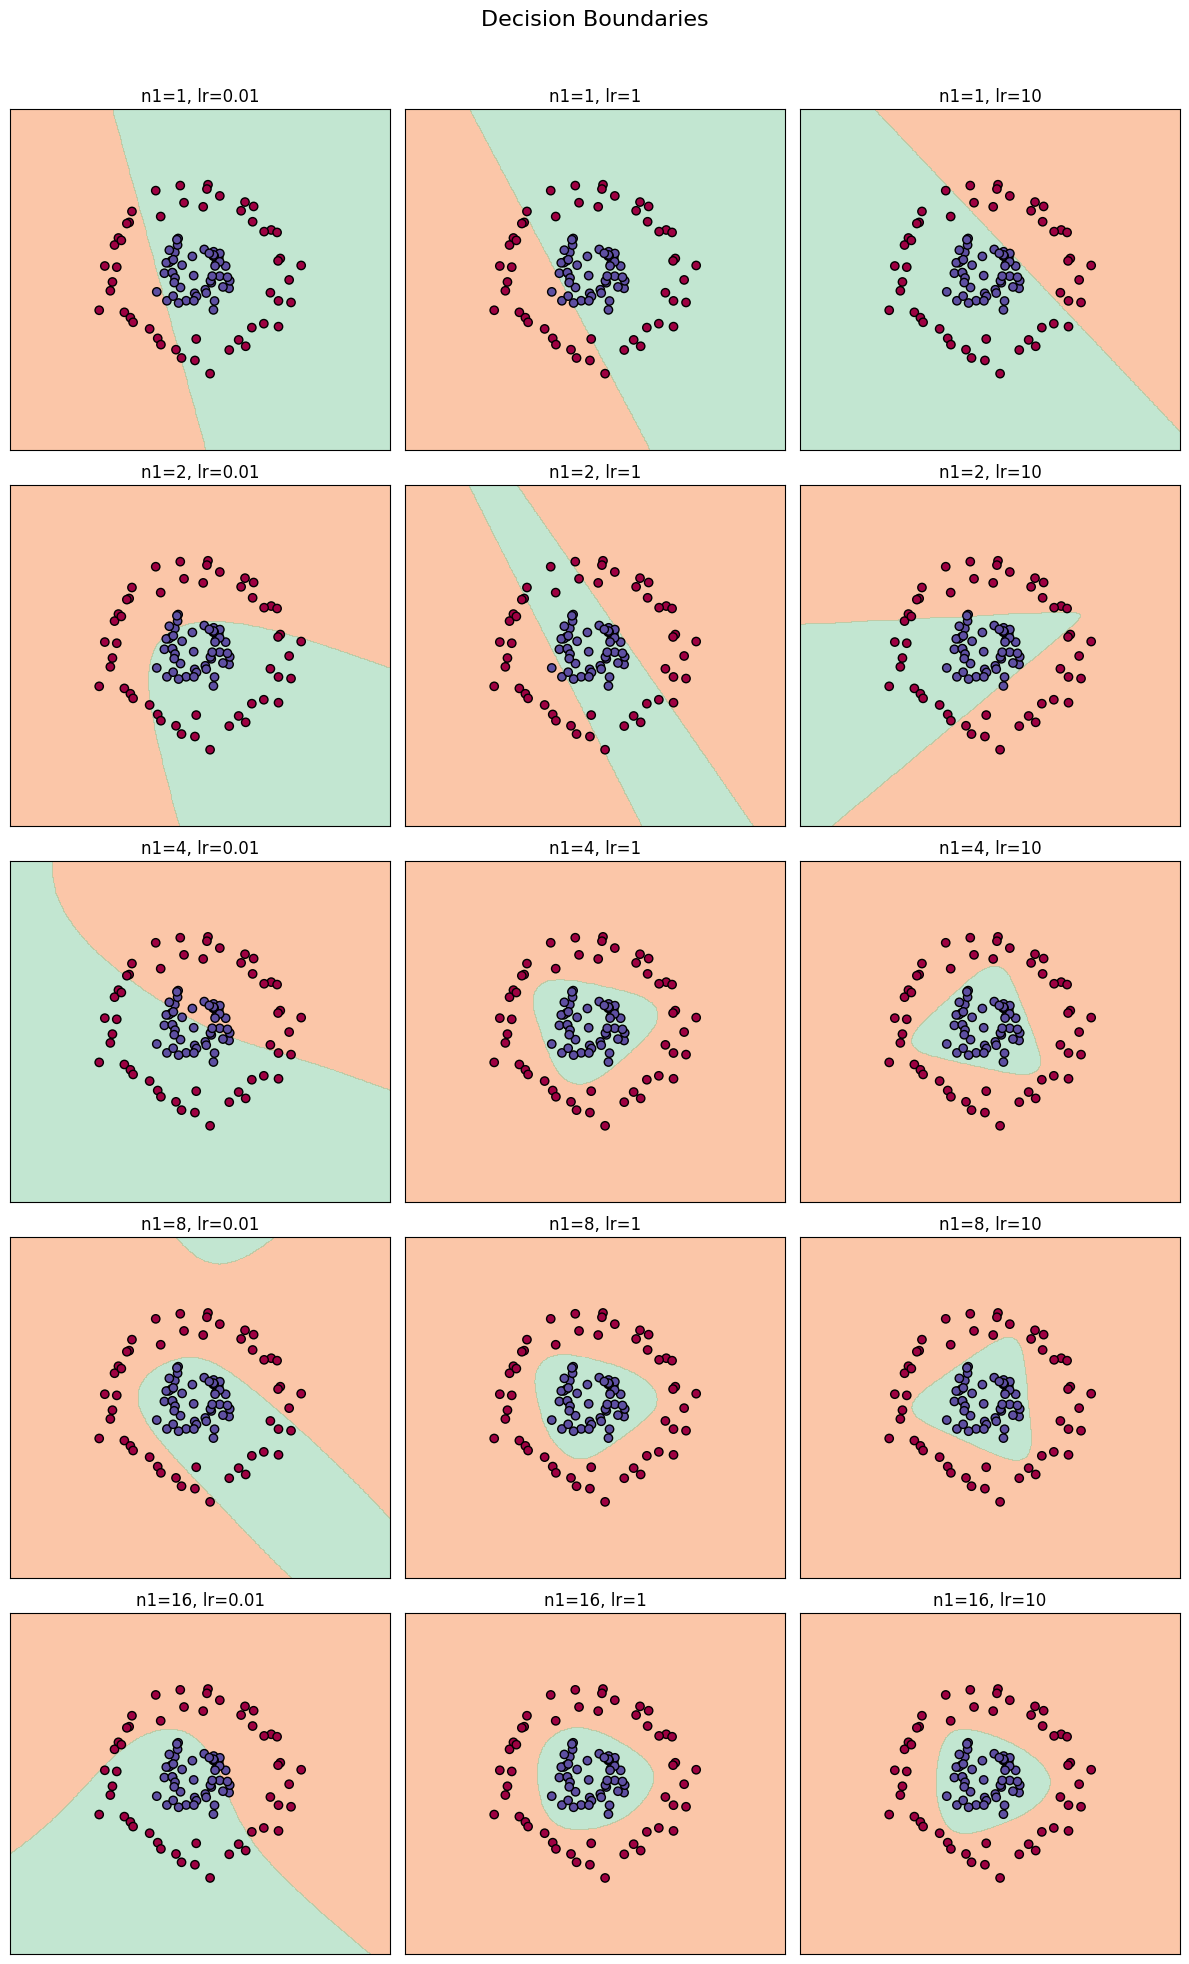

In [19]:
neurons_list = [1, 2, 4, 8, 16]
lr_list = [0.01, 1, 10]
plot_multiple_boundaries(X, y, neurons_list, lr_list, epoch=1000)


### Observations

- **1 neuron**:  
  The model behaves like a simple logistic regression — the decision boundary is linear.  
  This is expected, since one neuron with a sigmoid activation essentially acts like a linear classifier.

- **2 neurons**:  
  The decision boundary becomes slightly curved (e.g., quadratic), but still not expressive enough to separate the two classes.  
  The model starts capturing non-linearities, but not sufficiently.

- **From 4 neurons and above**:  
  The decision boundary becomes significantly more complex and flexible, which allows the network to properly separate the two classes.  
  More neurons = more capacity to learn complex patterns.

**Learning rate effects (with fixed number of epochs) :**

- **Too small**:  
  The model learns very slowly — it may not converge in time, or at all within the given number of epochs.

- **Too large**:  
  The model can diverge — it overshoots the optimal point and the loss may oscillate or even explode.

> It's important to tune the learning rate carefully depending on the number of epochs and data complexity.


**Why the number of neurons in the hidden layer is a multiple of 2?**

There is no theoretical constraint that forces you to use an even number of neurons in a hidden layer.

However, in practice, even numbers are commonly chosen as a default for several reasons:
- *Efficiency*: Vectorized operations on GPUs/CPUs are faster with sizes like 8, 16, 32, etc.
- *Convention*: These sizes are widely used in tutorials, libraries, and benchmarks.
- *Reproducibility*: Using common hyperparameter sizes makes results easier to compare.

So while you're free to experiment with any number of neurons, a multiple of 2 is often a good starting point.



Okay, now you know how to build a neural network from scratch.\
You know how to initialize the parameters, compute the forward propagation, compute the cost, optimize the parameters and compute the accuracy.\
You know how to visualize the decision boundary and understand the effects of the number of neurons in the hidden layer and the learning rate.\
You know how to build a neural network with 2 layers and how to train it.

# Cat VS Dog

Remember the cat vs dog dataset?\
You can now build a neural network to classify the images of cats and dogs.

> **We'll try to test our neural network on the cat vs dog dataset.**

But before that, tell me what to do first. Tell me what is one of the most important thing to do before training a neural network.

## Data Preprocessing

In [20]:
#%pip install h5py
#%pip install nbimporter
from utilities import *

First, we need to preprocess the data.
- **Load the data**: Load the cat vs dog dataset.
- **Resize the images**: Resize the images to a fixed size (e.g., 64x64 pixels).
- **Normalize the pixel values**: Scale the pixel values to be between 0 and 1.
- **Split the data**: Split the data into training and test sets.

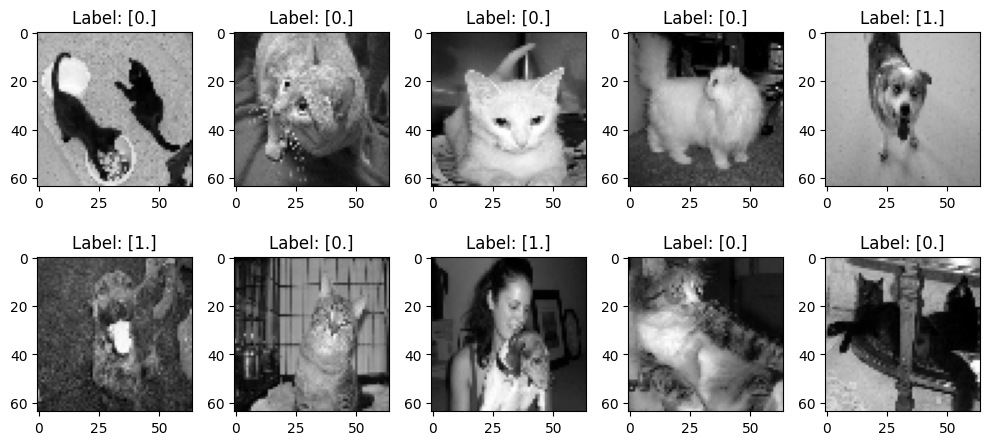

In [21]:
X_train, y_train, X_test, y_test = load_data()

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.tight_layout()
plt.show()

The data is already split into training and test sets, so we just need to load the data and preprocess it.

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1000, 64, 64), (1000, 1), (200, 64, 64), (200, 1))

1000 images of cats and dogs of 64x64 pixels.

We work woth a neural network, so we need to transpose the data to have the shape we want: (n_features, n_samples) here.

In [23]:
X_train = X_train.T
X_test = X_test.T
X_train.shape, X_test.shape




((64, 64, 1000), (64, 64, 200))

In [24]:
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1]) / X_test.max()
X_train_reshaped.shape, X_test_reshaped.shape

((4096, 1000), (4096, 200))

Perfect. 4096 features for each image, and 1000 images in total for the training and 200 for the test.

Remember ? Each image is now a vector of 4096 variables that represents each pixel values of the image.

Normalizing these values and putting all the images in an array of shape (4096, 1000), and you have your dataset ready to be used in a neural network.

In [25]:
y_train.shape, y_test.shape

((1000, 1), (200, 1))

In [26]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = W1.dot(X) + b1
    
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    return {'A1': A1, 'A2': A2}

In [27]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[0] 

    dZ2 = A2 - y.T # Transpose y to match the shape of dZ2
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients


In [28]:
def neural_network2(X_train, y_train, X_test, y_test, n1=32, 
                    learning_rate=0.1, epoch=1000):
    def log_loss(A, y):
        m = len(y)
        epsilon = 1e-15
        return -1/m * np.sum(y * np.log(A + epsilon) + 
                       (1 - y) * np.log(1 - A + epsilon))

    # Dimensions
    n0 = X_train.shape[0]  # input dimension
    n2 = y_train.shape[1]  # output dimension (binary classification again,
                           #                        between cats and dogs)

    # Init
    np.random.seed(0)

    # neural network structure initialisation
    parameters = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []

    test_loss = []
    test_acc = []

    for i in tqdm(range(epoch)):
        # Forward
        activations = forward_propagation(X_train, parameters)
        A2 = activations['A2'].flatten()  # output

        if i % 50 == 0:
            # Train
                # Loss
            y_train = y_train.flatten()
            train_loss.append(log_loss(A2, y_train))

                # Accuracy
            y_pred = predict(X_train, parameters).flatten()
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            activations_test = forward_propagation(X_test, parameters)
            A2_test = activations_test['A2'].flatten()
                # Loss
            y_test = y_test.flatten()
            test_loss.append(log_loss(A2_test, y_test))

                # Accuracy
            y_pred = predict(X_test, parameters).flatten()
            test_acc.append(accuracy_score(y_test, y_pred))


        # Update
        gradients = back_propagation(X_train, y_train, parameters, activations)
        parameters = update(gradients, parameters, learning_rate)

    # Plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].plot(train_loss, label='Train Loss')
    ax[0].plot(test_loss, label='Test Loss')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[1].plot(train_acc, label='Train Accuracy')
    ax[1].plot(test_acc, label='Test Accuracy')
    ax[1].set_title('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    plt.tight_layout()
    plt.suptitle("Training and Test Loss/Accuracy", fontsize=16)
    plt.subplots_adjust(top=0.93)   

    plt.show()

    return parameters


  0%|          | 4/10000 [00:00<18:16,  9.11it/s]

100%|██████████| 10000/10000 [04:07<00:00, 40.43it/s]


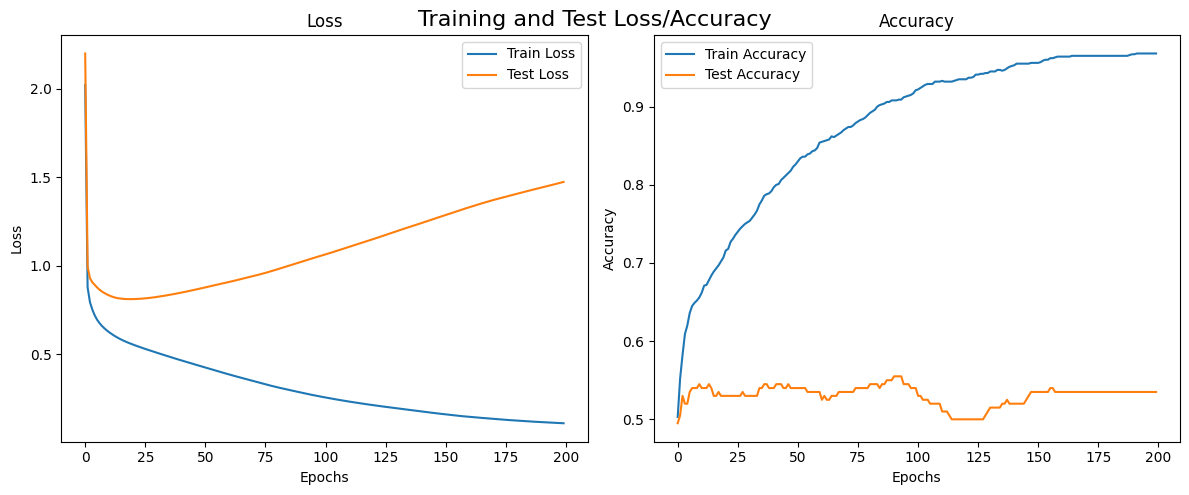

In [29]:
parameters = neural_network2(X_train_reshaped, y_train, X_test_reshaped, y_test, 
                             n1=64, learning_rate=0.1, epoch=10000)

The loss is low for the training and test set but starts to increase for the test set.

The training accuracy is increasing but the test accuracy is not.

This is a sign of **overfitting**. The model learns the training data too well, but it doesn't generalize to the test data.

Let's try to add more layers to the neural network and see if it helps.

In order to do that, we are goind to resume all the work we've done so far in the last notebook. We will create our last neural network on which we will have control over its whole structure and every parameters.